In [1]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import csv
data=pd.read_csv('/Users/sezin/PycharmProjects/Per-Title_encoding/Data/clip_encode_merged_data.csv')

In [3]:
data.head()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,video_profile,clip_frame_rate,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,psnr,vmaf
0,7,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,18,18667784.0,3,8,44.621550,99.406406
1,8,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,19,16379868.0,3,8,44.051502,99.192502
2,9,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,20,14293883.0,3,8,43.408926,98.924590
3,10,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,27,3985062.0,3,8,38.802828,89.462670
4,11,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,29,2969404.0,3,8,37.790129,84.728349


In [4]:
data.describe()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,psnr,vmaf
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.0,5479.000000,5479.000000,5.479000e+03,5.479000e+03,5479.000000,5.410000e+03,5479.000000,5479.000000,2302.000000,4790.000000
mean,5191.563789,58.070451,829.614163,526.817302,1920.0,984.271582,132.718379,1.413721e+08,1.714677e+07,32.146195,9.384927e+05,3.981201,7.981383,32.776278,50.013707
std,3502.790633,44.550308,536.285361,270.136914,0.0,133.045663,73.418579,7.516743e+07,3.122918e+07,9.923897,1.940428e+06,2.591553,5.767905,6.053482,28.610170
min,7.000000,5.000000,320.000000,240.000000,1920.0,816.000000,19.000000,8.388608e+06,3.208250e+05,18.000000,6.628000e+03,1.000000,1.000000,19.659002,0.065712
25%,3063.500000,29.000000,384.000000,288.000000,1920.0,816.000000,105.000000,9.352000e+07,9.017049e+06,23.000000,1.103292e+05,2.000000,4.000000,27.981235,24.908225
50%,4545.000000,42.000000,640.000000,480.000000,1920.0,1080.000000,135.000000,1.457467e+08,9.609458e+06,30.000000,3.222625e+05,3.000000,7.000000,32.782581,51.108541
75%,9086.500000,106.000000,1280.000000,720.000000,1920.0,1080.000000,151.000000,1.791446e+08,9.934026e+06,40.000000,8.849682e+05,5.000000,11.000000,36.977984,74.964342
max,10918.000000,146.000000,1920.000000,1080.000000,1920.0,1440.000000,396.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,14.000000,32.000000,49.104119,99.479527


In [5]:
#check if there are null values
data.isnull().sum()

encode_id                  0
clip_id                    0
encode_width               0
encode_height              0
clip_width                 0
clip_height                0
clip_duration              0
clip_size                  0
clip_bitrate_total         0
video_profile              0
clip_frame_rate            0
crf                        0
encode_bitrate_video      69
nr_of_images               0
nr_of_image_shifts         0
psnr                    3177
vmaf                     689
dtype: int64

In [6]:
#drop rows
#here I simply dropped the null values and ofcourse lost some info. Later I will try to ampute data with mean.


In [7]:
data.describe()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,psnr,vmaf
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.0,5479.000000,5479.000000,5.479000e+03,5.479000e+03,5479.000000,5.410000e+03,5479.000000,5479.000000,2302.000000,4790.000000
mean,5191.563789,58.070451,829.614163,526.817302,1920.0,984.271582,132.718379,1.413721e+08,1.714677e+07,32.146195,9.384927e+05,3.981201,7.981383,32.776278,50.013707
std,3502.790633,44.550308,536.285361,270.136914,0.0,133.045663,73.418579,7.516743e+07,3.122918e+07,9.923897,1.940428e+06,2.591553,5.767905,6.053482,28.610170
min,7.000000,5.000000,320.000000,240.000000,1920.0,816.000000,19.000000,8.388608e+06,3.208250e+05,18.000000,6.628000e+03,1.000000,1.000000,19.659002,0.065712
25%,3063.500000,29.000000,384.000000,288.000000,1920.0,816.000000,105.000000,9.352000e+07,9.017049e+06,23.000000,1.103292e+05,2.000000,4.000000,27.981235,24.908225
50%,4545.000000,42.000000,640.000000,480.000000,1920.0,1080.000000,135.000000,1.457467e+08,9.609458e+06,30.000000,3.222625e+05,3.000000,7.000000,32.782581,51.108541
75%,9086.500000,106.000000,1280.000000,720.000000,1920.0,1080.000000,151.000000,1.791446e+08,9.934026e+06,40.000000,8.849682e+05,5.000000,11.000000,36.977984,74.964342
max,10918.000000,146.000000,1920.000000,1080.000000,1920.0,1440.000000,396.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,14.000000,32.000000,49.104119,99.479527


In [8]:
data.shape

(5479, 17)

In [9]:
#data.to_csv('/Users/sezin/PycharmProjects/Per-Title_encoding/Data/clip_encode_merged_data_wo_null.csv')

In [10]:
#drop ids and psnr column
new_data = data.drop(columns=['encode_id', 'clip_id', 'psnr','video_profile','clip_frame_rate'])
new_data.describe()

,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,vmaf
count,5479.000000,5479.000000,5479.0,5479.000000,5479.000000,5.479000e+03,5.479000e+03,5479.000000,5.410000e+03,5479.000000,5479.000000,4790.000000
mean,829.614163,526.817302,1920.0,984.271582,132.718379,1.413721e+08,1.714677e+07,32.146195,9.384927e+05,3.981201,7.981383,50.013707
std,536.285361,270.136914,0.0,133.045663,73.418579,7.516743e+07,3.122918e+07,9.923897,1.940428e+06,2.591553,5.767905,28.610170
min,320.000000,240.000000,1920.0,816.000000,19.000000,8.388608e+06,3.208250e+05,18.000000,6.628000e+03,1.000000,1.000000,0.065712
25%,384.000000,288.000000,1920.0,816.000000,105.000000,9.352000e+07,9.017049e+06,23.000000,1.103292e+05,2.000000,4.000000,24.908225
50%,640.000000,480.000000,1920.0,1080.000000,135.000000,1.457467e+08,9.609458e+06,30.000000,3.222625e+05,3.000000,7.000000,51.108541
75%,1280.000000,720.000000,1920.0,1080.000000,151.000000,1.791446e+08,9.934026e+06,40.000000,8.849682e+05,5.000000,11.000000,74.964342
max,1920.000000,1080.000000,1920.0,1440.000000,396.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,14.000000,32.000000,99.479527


In [11]:
new_data=new_data.dropna()

In [12]:
#train test split
e_train, e_test = train_test_split(new_data, test_size=0.2)
print(e_train.shape,e_test.shape)

(3832, 12) (958, 12)


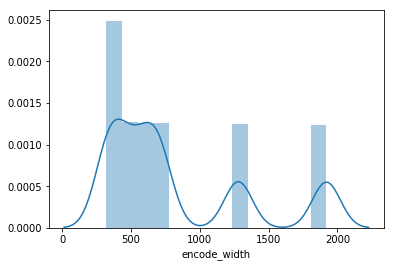

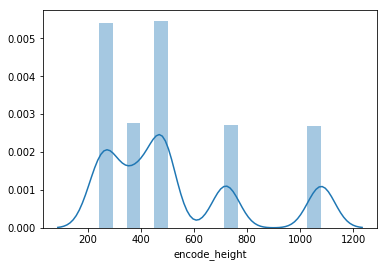

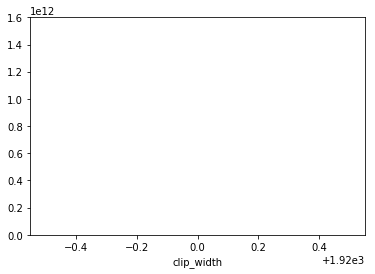

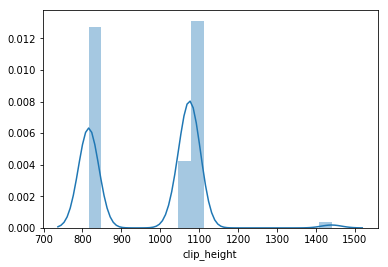

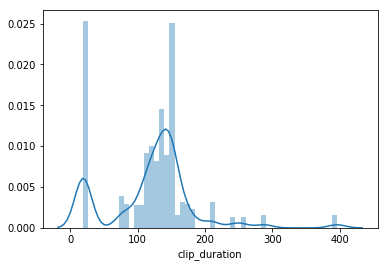

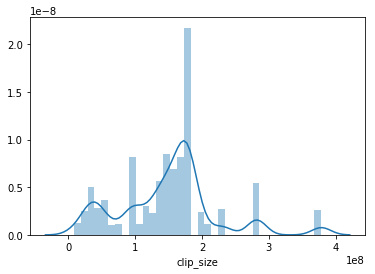

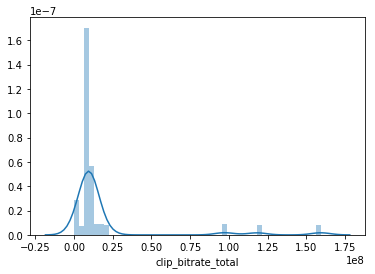

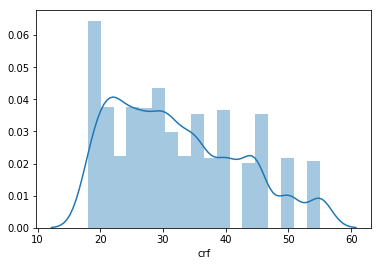

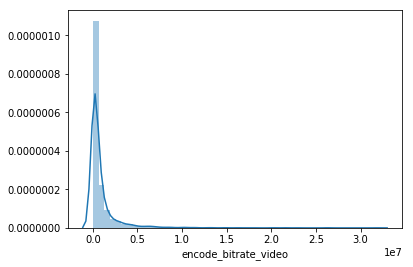

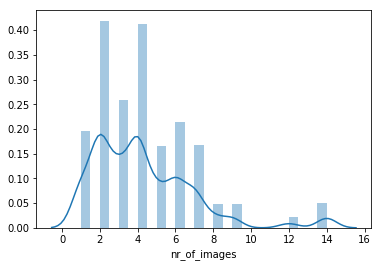

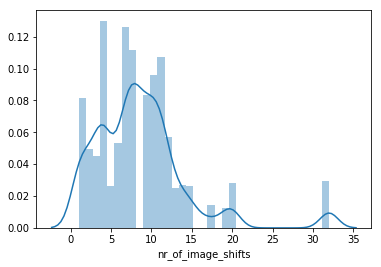

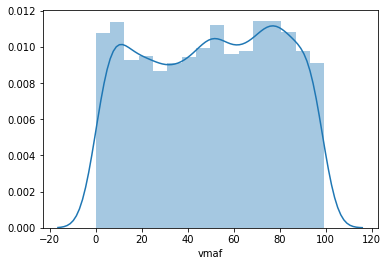

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in list(e_train):
    #plt.hist(e_train[column])
    sns.distplot(e_train[column])
    plt.show()

In [14]:
print(e_test.describe())

       encode_width  encode_height  clip_width  clip_height  clip_duration  \
count    958.000000     958.000000       958.0   958.000000     958.000000   
mean     850.555324     537.770355      1920.0   969.544885     118.064718   
std      543.712399     273.341958         0.0   136.015802      66.072140   
min      320.000000     240.000000      1920.0   816.000000      19.000000   
25%      384.000000     288.000000      1920.0   816.000000      81.000000   
50%      640.000000     480.000000      1920.0  1056.000000     131.000000   
75%     1280.000000     720.000000      1920.0  1080.000000     149.000000   
max     1920.000000    1080.000000      1920.0  1440.000000     396.000000   

          clip_size  clip_bitrate_total         crf  encode_bitrate_video  \
count  9.580000e+02        9.580000e+02  958.000000          9.580000e+02   
mean   1.480925e+08        1.996114e+07   32.458246          9.662222e+05   
std    7.556696e+07        3.431767e+07   10.264721          2.093

In [15]:
print(e_train.describe())

       encode_width  encode_height  clip_width  clip_height  clip_duration  \
count   3832.000000    3832.000000      3832.0  3832.000000    3832.000000   
mean     822.855950     523.509395      1920.0   970.741127     120.440240   
std      532.460057     268.223872         0.0   137.128374      65.264073   
min      320.000000     240.000000      1920.0   816.000000      19.000000   
25%      384.000000     288.000000      1920.0   816.000000      97.000000   
50%      640.000000     480.000000      1920.0  1056.000000     133.000000   
75%     1280.000000     720.000000      1920.0  1080.000000     149.000000   
max     1920.000000    1080.000000      1920.0  1440.000000     396.000000   

          clip_size  clip_bitrate_total          crf  encode_bitrate_video  \
count  3.832000e+03        3.832000e+03  3832.000000          3.832000e+03   
mean   1.490701e+08        1.891837e+07    32.206681          9.174280e+05   
std    7.378692e+07        3.255502e+07    10.021255          1

In [16]:
e_train.isnull().sum()

encode_width            0
encode_height           0
clip_width              0
clip_height             0
clip_duration           0
clip_size               0
clip_bitrate_total      0
crf                     0
encode_bitrate_video    0
nr_of_images            0
nr_of_image_shifts      0
vmaf                    0
dtype: int64

### Test Model

In [17]:
data_y_train = e_train['vmaf']
data_X_train = e_train.drop(columns=['vmaf'])


data_y_test = e_test['vmaf']
data_X_test = e_test.drop(columns=['vmaf'])

In [18]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(data_X_train, data_y_train)
print(linear_regression_model.coef_)

[-3.87815537e-02  1.37013211e-01  3.40819639e-10 -2.32962920e-02
  3.35418125e-02 -1.60373682e-08 -2.31643829e-08 -2.14818256e+00
 -4.46525340e-07  3.90783150e-02  2.70255309e-01]


In [19]:
y_pred = linear_regression_model.predict(data_X_test)

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(data_y_test, y_pred)

7.775162605648506

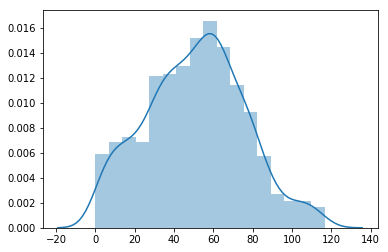

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(abs(y_pred))
plt.show()